In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import preprocessing
# 判断是否需要标准化
scale = True

In [29]:
# load data
data = np.genfromtxt('LR-testSet.csv',delimiter=',')
x_data = data[:,:-1]
y_data = data[:,-1]

In [30]:
def plot():
    x0 = []
    x1 = []
    y0 = []
    y1 = []
    
    # 切分不同类型的数据
    for i in range(len(x_data)):
        if y_data[i] == 0:
            x0.append(x_data[i,0])
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])
    # plot
    scatter0 = plt.scatter(x0, y0, c='b', marker='o')
    scatter1 = plt.scatter(x1, y1, c='r', marker='x')
    
    plt.legend(handles=[scatter0, scatter1], labels=['label0','label1'],loc='best')

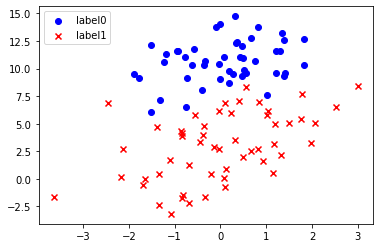

In [11]:
plot()

In [31]:
plt.show()

In [32]:
x_data = data[:,:-1]
y_data = data[:,-1,np.newaxis]

In [33]:
print(np.mat(x_data).shape)
print(np.mat(y_data).shape)

(100, 2)
(100, 1)


In [34]:
# 加上偏置值
X_data = np.concatenate((np.ones((100,1)),x_data),axis=1)

In [35]:
print(np.mat(X_data).shape)

(100, 3)


In [36]:
# sigmod function
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

# cost function
def cost(xMat, yMat, ws):
    left = np.multiply(yMat, np.log(sigmoid(xMat*ws)))
    right = np.multiply(1 - yMat, np.log(1 - sigmoid(xMat*ws)))
    return np.sum(left + right) / -(len(xMat))

# Gradient Descent
def graddient_descent(xArr, yArr):
    if scale == True:
        xArr = preprocessing.scale(xArr)
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    
    learning_rate = 0.001
    epochs = 10000
    costList = []
    
    m,n = np.shape(xMat)
    
    # initiate weight matrix
    ws = np.mat(np.ones((n, 1)))
    
    for i in range(epochs+1):
        h = sigmoid(xMat*ws)
        
        # 误差,迭代用
        ws_grad = xMat.T*(sigmoid(xMat*ws) - yMat) / m
        ws -= learning_rate*ws_grad
        
        if i % 50 == 0:
            costList.append(cost(xMat,yMat,ws))
    return ws,costList

In [37]:
# train the model
ws,costList = graddient_descent(X_data, y_data)
print(ws)

[[ 1.        ]
 [ 0.30816757]
 [-1.76171512]]


In [38]:
# draw the picture
# two points can make a line

if scale == False:
    # draw the scatter first
    plot()
    x_test = [[-4],[3]]
    y_test = (-ws[0] - x_test*ws[1]) / ws[2]
    plt.plot(x_test,y_test,'k')
    plt.show()

Text(0, 0.5, '')

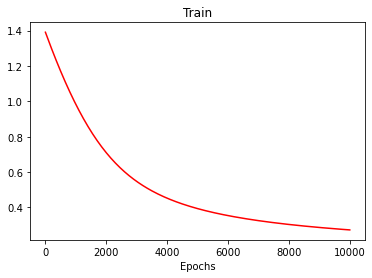

In [39]:
# draw loss
x = np.linspace(0,10000,201)
plt.plot(x, costList, c='r')
plt.title('Train')
plt.xlabel('Epochs')
plt.ylabel('')

In [40]:
# predict
def predict(x_data, ws):
    if scale == True:
        x_data = preprocessing.scale(x_data)
    xMat = np.mat(x_data)
    ws = np.mat(ws)
    
    return [1 if x >= 0.5 else 0 for x in sigmoid(xMat*ws)]

In [41]:
predictions = predict(X_data, ws)
print(classification_report(y_data, predictions))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        47
         1.0       1.00      0.92      0.96        53

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100

